# Matplotlib使用详解VII
## 自定义的色彩带

图例说明离散点的离散标签。对于基于点、线或区域颜色的连续标签，标记的色彩带可以是一个很好的工具。在Matplotlib中，色彩带是一个单独的轴，可以为图中颜色的含义提供一个键。

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

正如我们在本实验中多次看到的，可以用``plt.colorbar`` 函数创建最简单的色彩带：

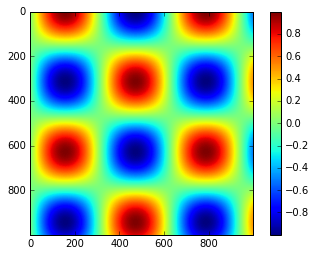

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

现在我们将讨论一些定制这些colorbars的想法，并在各种情况下有效地使用它们。

## 自定义的色彩带

色彩地图可以使用``cmap``参数来指定绘制可视化的绘图功能：

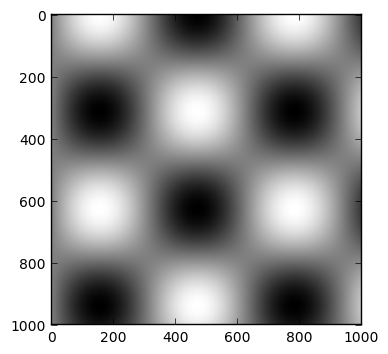

In [4]:
plt.imshow(I, cmap='gray');

所有可得的都是 ``plt.cm``的名称空间;使用IPython的表完成将给您一个完整的内置可能性列表:
```
plt.cm.<TAB>
```

但是，选择一个colormap仅仅是第一步:更重要的是如何决定是否有可能!

这个选择比你最初预期的要微妙得多。


### 选择Colormap

全面的颜色选择可视化超出了本课程的范围之内,但是对于娱乐阅读在这个问题上和其他人,看到这篇文章["十个简单规则更好的数据s"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)。

Matplotlib的在线文档也有一个关于colormap选择的["有趣的讨论"](http://Matplotlib.org/1.4.1/users/colormaps.html)

总的来说，你应该知道三种不同的Colormap类型:

- *顺序的colormaps*:这些是由一个连续的颜色序列组成的(例如，``binary`` 或者 ``viridis``)。

- *不同的colormaps*:它们通常包含两种不同的颜色，显示出正的和负的偏离均值(例如，‘RdBu’或‘PuOr’)。

- *质性的colormaps*:这些混合颜色没有特定的序列(例如，``rainbow`` 或者``jet``)。

``jet``的“colormap是在版本2.0之前的Matplotlib中默认的，是一个定性的colormap的例子。

它的默认状态是非常不幸的，因为定性的映射通常是表示定量数据的糟糕选择。

在这些问题中，有一个事实是，随着规模的增加，定性地图通常不会在亮度上显示任何均匀的进展。

我们可以通过将``jet``的``colorbar``转换为“黑与白”来实现这一点:

In [5]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

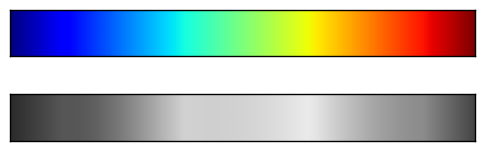

In [6]:
view_colormap('jet')

注意灰度图像中的亮条纹。

即使是在全彩色的情况下，这种不均匀的亮度也意味着眼睛会被吸引到颜色范围的某些部分，这可能会强调数据集中不重要的部分。

最好使用像``viridis`` 这样的colormap(默认为Matplotlib 2.0)，它是专门构造的，在整个范围内具有均匀的亮度变化。

因此，它不仅能很好地发挥我们的色彩感知，而且能很好地转化为灰度印刷:

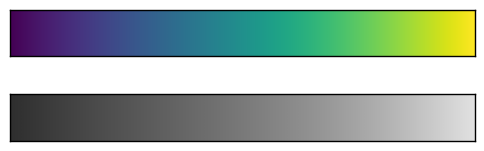

In [7]:
view_colormap('viridis')

如果你喜欢彩虹设置，连续数据的另一个好的选择是 ``cubehelix``的colormap:

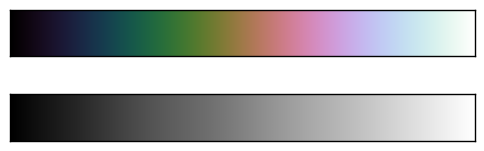

In [8]:
view_colormap('cubehelix')

在其他情况下，比如显示出正的和负的偏离，例如``RdBu``(*红蓝*)等双色的色卡会很有用。但是，正如您在下图中看到的，需要注意的是，在转换到灰度时，正负极信息将会丢失!

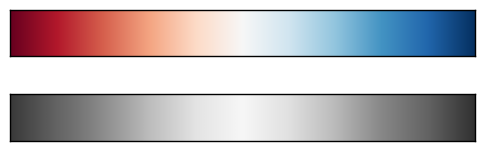

In [9]:
view_colormap('RdBu')

我们将在继续使用这些color maps的例子。

在Matplotlib中有大量的colormaps;要查看它们的列表，您可以使用IPython来探索``plt.cm`` 的子模块。

### 颜色的限制和扩展

Matplotlib允许大量的colorbar定制。colorbar本身就是一个``plt.Axes``的实例。我们已经学过的所有的坐标轴和标记格式的技巧都是适用的。colorbar有一些有趣的灵活性:例如，我们可以通过设置``扩展``属性来缩小颜色限制，并在顶部和底部用三角形箭头表示界外值。这可能会派上用场，例如，如果显示的图像是受噪声影响的:

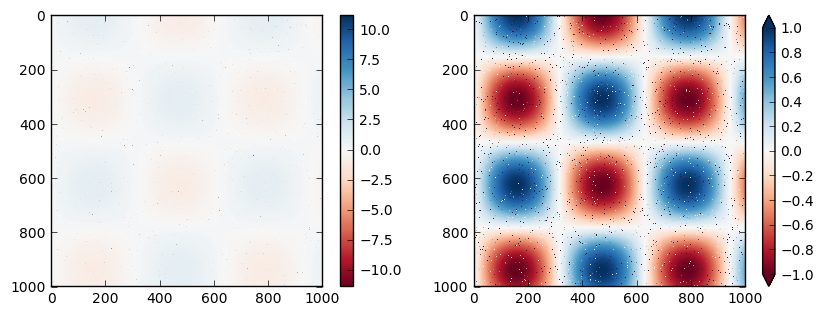

In [10]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

请注意，在左侧面板中，默认的颜色限制对噪声像素的响应，以及噪声的范围完全清洗——我们感兴趣的模式。在右边的面板中，我们手动设置了颜色限制，并添加了扩展，以指示在这些限制之上或以下的值。其结果是对我们的数据进行更有用的可视化。

### 分开色彩块

Colormaps默认是连续的，但有时你想表示离散值。最简单的方法是使用 ``plt.cm.get_cmap()``函数，并将一个合适的colormap的名称和所需的容器的数量一起传递:

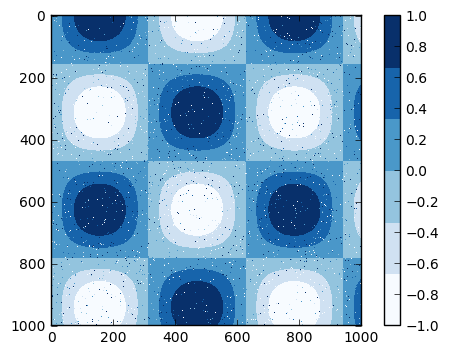

In [11]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

colormap的离散版本可以像其他colormap一样使用。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 1:</h1>
<b>对上文所产生的图像进行参数修改，将色彩坐标轴（-1,1）的颜色分为10种，并将颜色改为红色，看看有什么变化。</b>
</div>

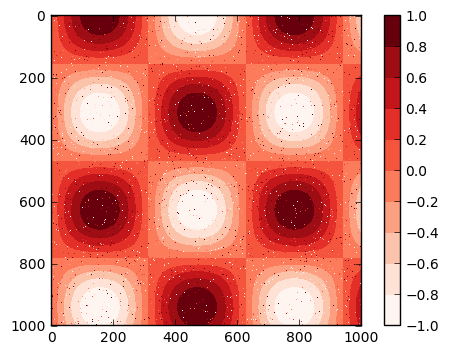

In [12]:
plt.imshow(I, cmap=plt.cm.get_cmap('Reds', 10))
plt.colorbar()
plt.clim(-1, 1);

 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q1" class="collapse">
```
代码：
plt.imshow(I, cmap=plt.cm.get_cmap('Reds', 10))
plt.colorbar()
plt.clim(-1, 1);
    


```
</div>



 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 2:</h1>
<b>对上文所产生的图像进行参数修改，将色彩坐标轴改为（-2,2），看看有什么变化。</b>
</div>

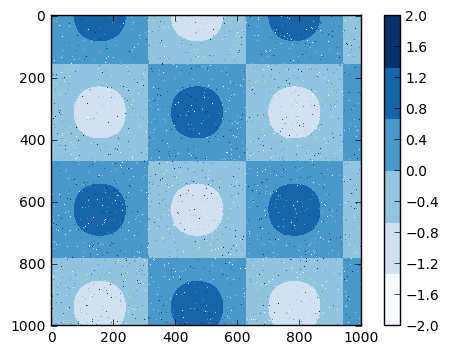

In [13]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-2, 2);

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q2" class="collapse">
```
代码：
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-2, 2);
    


```
</div>



## 例子: 手写的数字

对于这个可能有用的例子，让我们看看一些手写的数字数据的有趣的可视化。这个数据包含在scikitt - learn中，包含了近2,000个 $8 \times 8$的缩略图，显示了各种手写的数字。

现在，让我们从下载数字数据开始，然后用``plt.imshow()``来可视化几个示例图像。

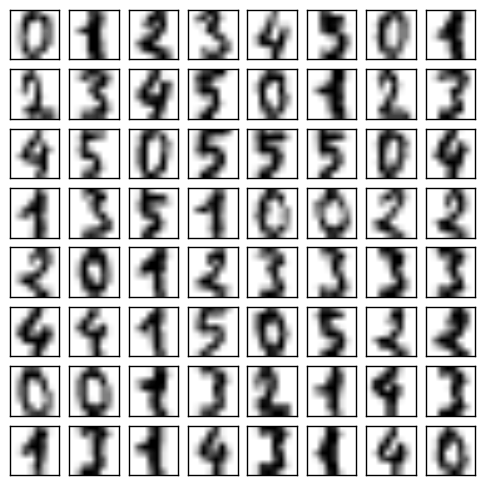

In [14]:
# 将数字0到5的图像加载并可视化其中的几个。
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

因为每个数字都是由64像素的颜色来定义的，所以我们可以把每一个数字看成是64维空间中的一个点:每个维度表示一个像素的亮度。但是在这种高维空间中可视化关系是非常困难的。一种方法是使用*维度缩减*技术，例如多方面的学习来减少数据的维度。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 3:</h1>
<b>对上文所产生的图像进行参数修改，导入0到9的数字图像到数字矩阵中，并将矩阵设为10*10。</b>
</div>

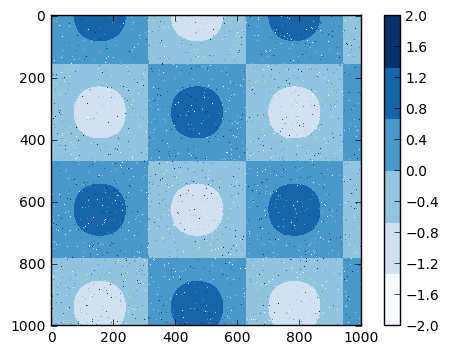

In [15]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-2, 2);

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q3" class="collapse">
```
代码：
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-2, 2);
    


```
</div>



In [16]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

我们将使用我们的离散colormap来查看结果，设置``ticks`` 和 ``clim`` 以改进结果的colorbar的美学:

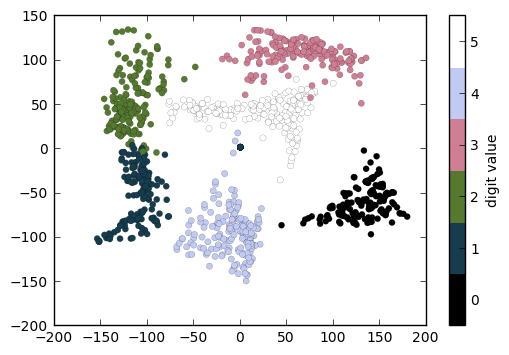

In [17]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

投影也给我们提供了一些有趣的见解:例如,5和3的范围几乎重叠在这种投影,表明一些手写5和3很难区分,因此更容易被自动分类算法。

其他的值，比如0和1，相距较远，因此不太可能被混淆。

这个观察和我们的直觉一致，因为5和3看起来比0和1更相似。